# New Section

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# !pip install -q --upgrade ipython==5.5.0
# !pip install -q --upgrade ipykernel==4.6.0

In [4]:
!unzip /content/gdrive/MyDrive/Solar_Panel/SolarPanelSoilingImageDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5499.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_55.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_550.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5500.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5501.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5502.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5503.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5504.jpg  
  inflating: SolarPanelSoilingImageDatas

In [5]:
data_dir = pathlib.Path('/content/SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset')

In [6]:
Brown_Dust = len(list(data_dir.glob('./Brown_Dust/*.jpg')))
print(Brown_Dust)

1458


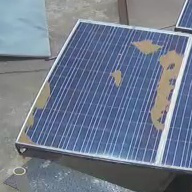

In [7]:
Brown_Dust = list(data_dir.glob('./Brown_Dust/*.jpg'))
PIL.Image.open(str(Brown_Dust[0]))

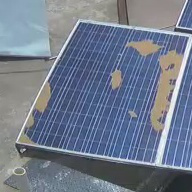

In [8]:
PIL.Image.open(str(Brown_Dust[900]))

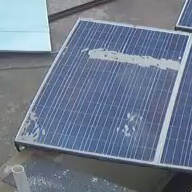

In [9]:
White_Powder = list(data_dir.glob('./White_Powder/*.jpg'))
PIL.Image.open(str(White_Powder[0]))

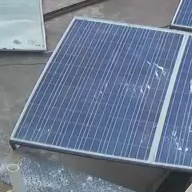

In [10]:
PIL.Image.open(str(White_Powder[900]))

In [11]:
batch_size = 32
img_height = 192
img_width = 192

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 45126 files belonging to 5 classes.
Using 36101 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 45126 files belonging to 5 classes.
Using 9025 files for validation.


In [14]:
# test_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 45126 files belonging to 5 classes.
Using 9025 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['Brown_Dust', 'Cleaned', 'Red_Sand', 'Red_Sand_With_White_Powder', 'White_Powder']


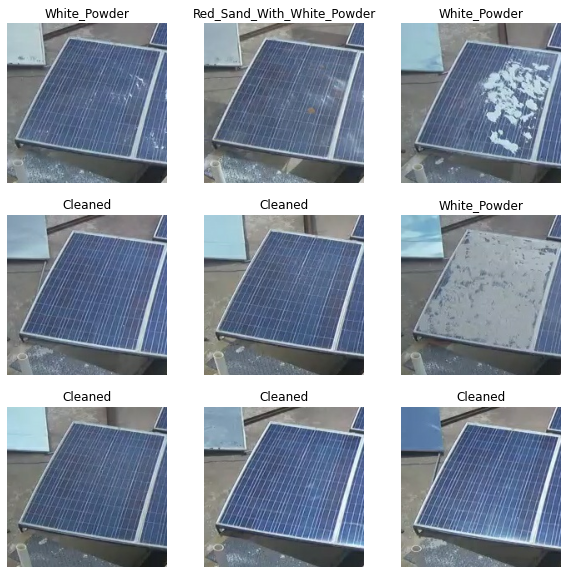

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 192, 192, 3)
(32,)


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
# normalization_layer = layers.Rescaling(1./255)

In [20]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [21]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

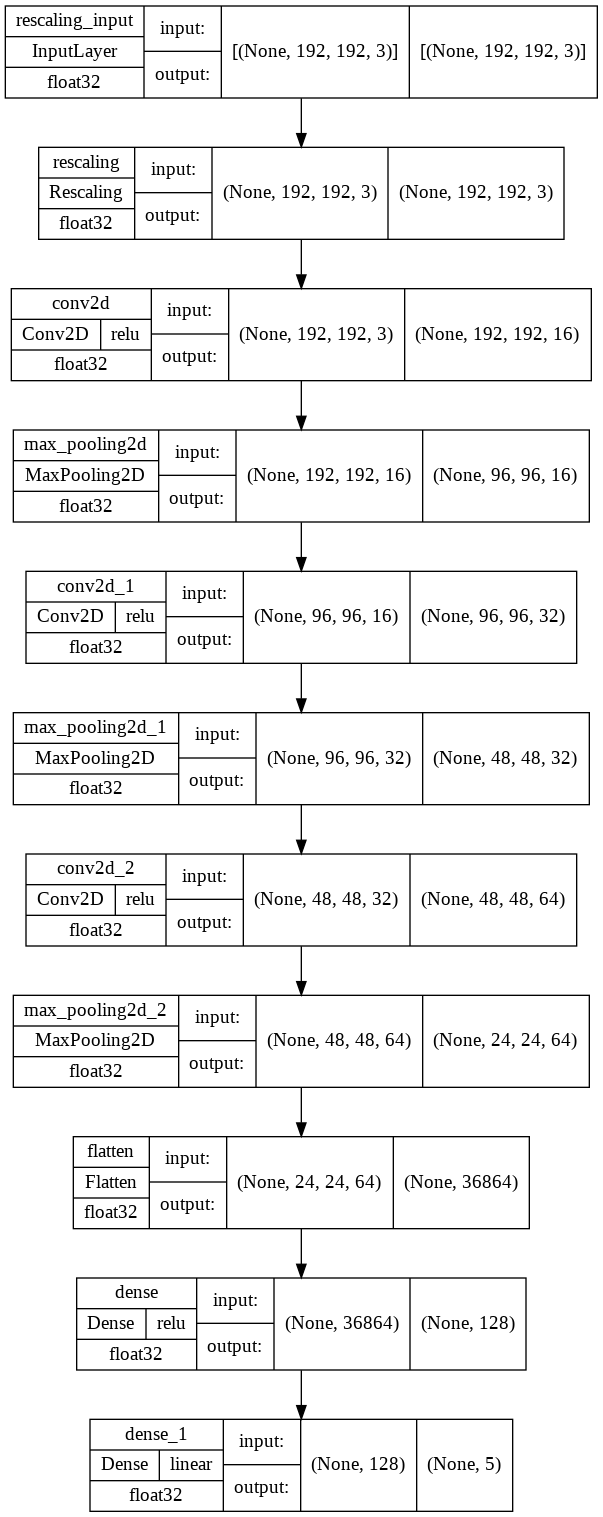

In [23]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, dpi=96,
    show_layer_activations=True
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 192, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        1

In [25]:
# epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1129/1129 [==============================] - 161s 136ms/step - loss: 0.1017 - accuracy: 0.9633 - val_loss: 0.0278 - val_accuracy: 0.9909
Epoch 2/10
1129/1129 [==============================] - 155s 137ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.0042 - val_accuracy: 0.9989
Epoch 3/10
1129/1129 [==============================] - 155s 137ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0215 - val_accuracy: 0.9915
Epoch 4/10
1129/1129 [==============================] - 154s 137ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0032 - val_accuracy: 0.9986
Epoch 5/10
1129/1129 [==============================] - 154s 137ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.0022 - val_accuracy: 0.9989
Epoch 6/10
1129/1129 [==============================] - 154s 136ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0027 - val_accuracy: 0.9990
Epoch 7/10
1129/1129 [==============================] - 153s 136ms/step - loss: 0.0068 - accuracy: 0.9979 - val_

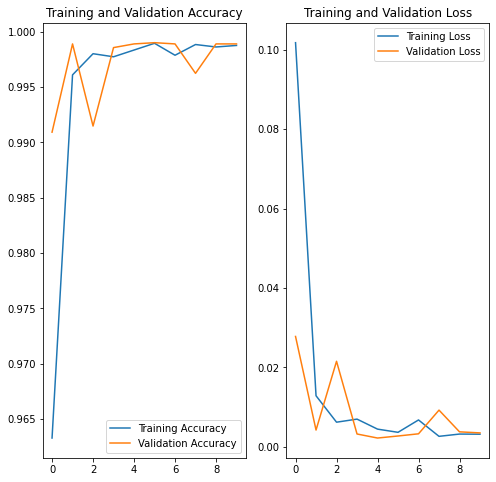

In [26]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
KERAS_MODE_NAME="relu_epoch10_batchsize32.h5"

In [37]:
model.save(KERAS_MODE_NAME)

In [40]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size = (192,192))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10) # the complies model is used
  score = tf.nn.softmax(classes[0])
  
  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  )



Saving WhatsApp Image 2022-03-10 at 20.01.10.jpeg to WhatsApp Image 2022-03-10 at 20.01.10.jpeg
This image most likely belongs to White_Powder with a 99.97 percent confidence.


In [30]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [31]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [32]:
convert_bytes(get_file_size(KERAS_MODE_NAME),"MB")

File size: 0.004 Megabytes


In [33]:
# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


In [ ]:
# model.summary()

In [ ]:
# epochs = 15
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

# img = tf.keras.utils.load_img(
#     sunflower_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )